<a href="https://colab.research.google.com/github/nitiniitp/House-prices-advanced-regression-techniques./blob/main/House_prices_advanced_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
train = pd.read_csv('/content/train.csv')
test =  pd.read_csv('/content/test.csv')
submission =  pd.read_csv('/content/sample_submission.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


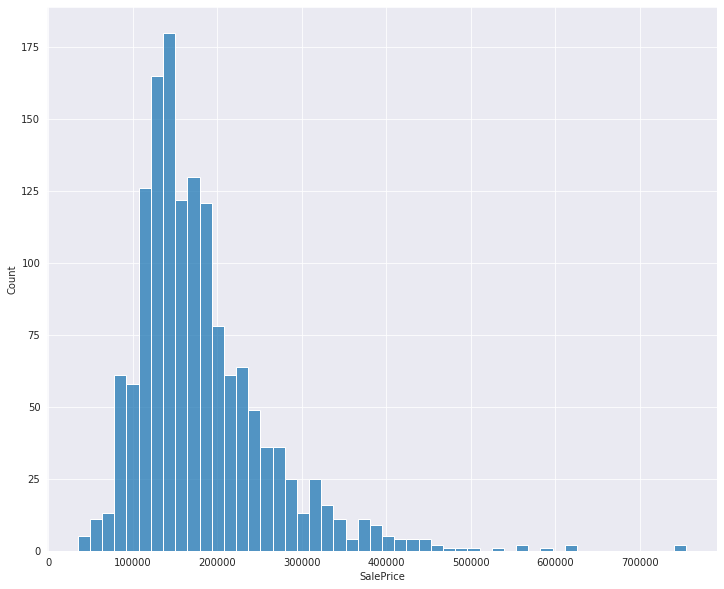

In [ ]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=train, x="SalePrice", bins=50,cbar=True)

In [ ]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


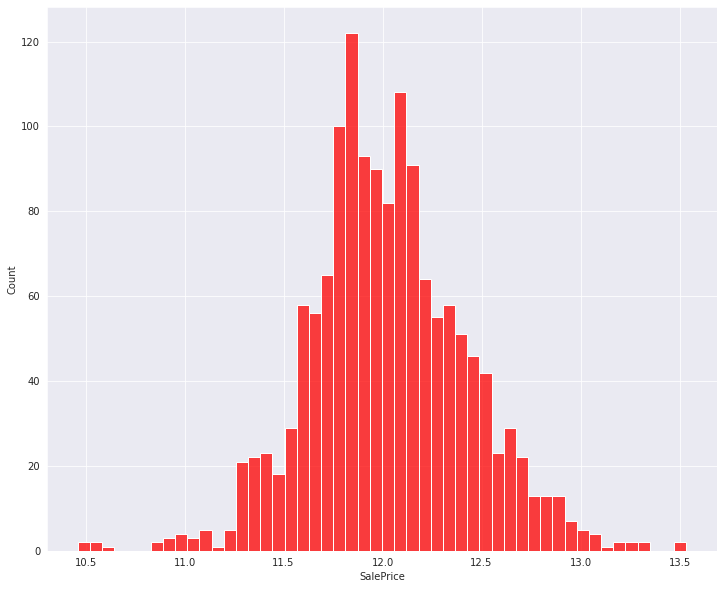

In [ ]:
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.histplot(data=train, x="SalePrice", bins=50,cbar=True,color="red")

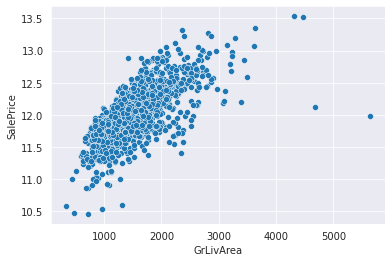

In [ ]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [ ]:
train=train.drop(train.loc[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,0)
train.reset_index(drop=True, inplace=True)

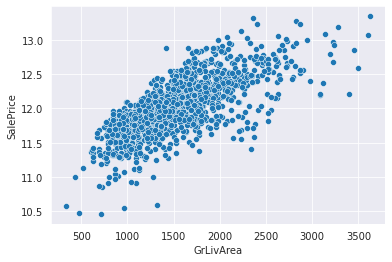

In [ ]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

In [ ]:
corr=train.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(2)
print(corr['SalePrice'])

SalePrice        1.00
OverallQual      0.82
GrLivArea        0.72
GarageCars       0.68
GarageArea       0.66
TotalBsmtSF      0.64
1stFlrSF         0.61
FullBath         0.59
YearBuilt        0.59
YearRemodAdd     0.57
GarageYrBlt      0.54
TotRmsAbvGrd     0.53
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.38
LotFrontage      0.36
WoodDeckSF       0.33
OpenPorchSF      0.33
HalfBath         0.31
2ndFlrSF         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.20
ScreenPorch      0.12
MoSold           0.06
3SsnPorch        0.06
PoolArea         0.04
BsmtFinSF2       0.01
BsmtHalfBath    -0.01
MiscVal         -0.02
YrSold          -0.03
OverallCond     -0.04
LowQualFinSF    -0.04
MSSubClass      -0.08
KitchenAbvGr    -0.15
EnclosedPorch   -0.15
Name: SalePrice, dtype: float64


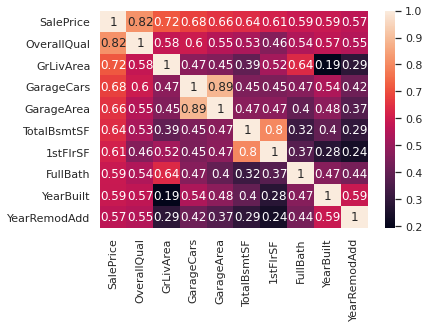

In [ ]:
import numpy as np
cols =corr['SalePrice'].head(10).index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

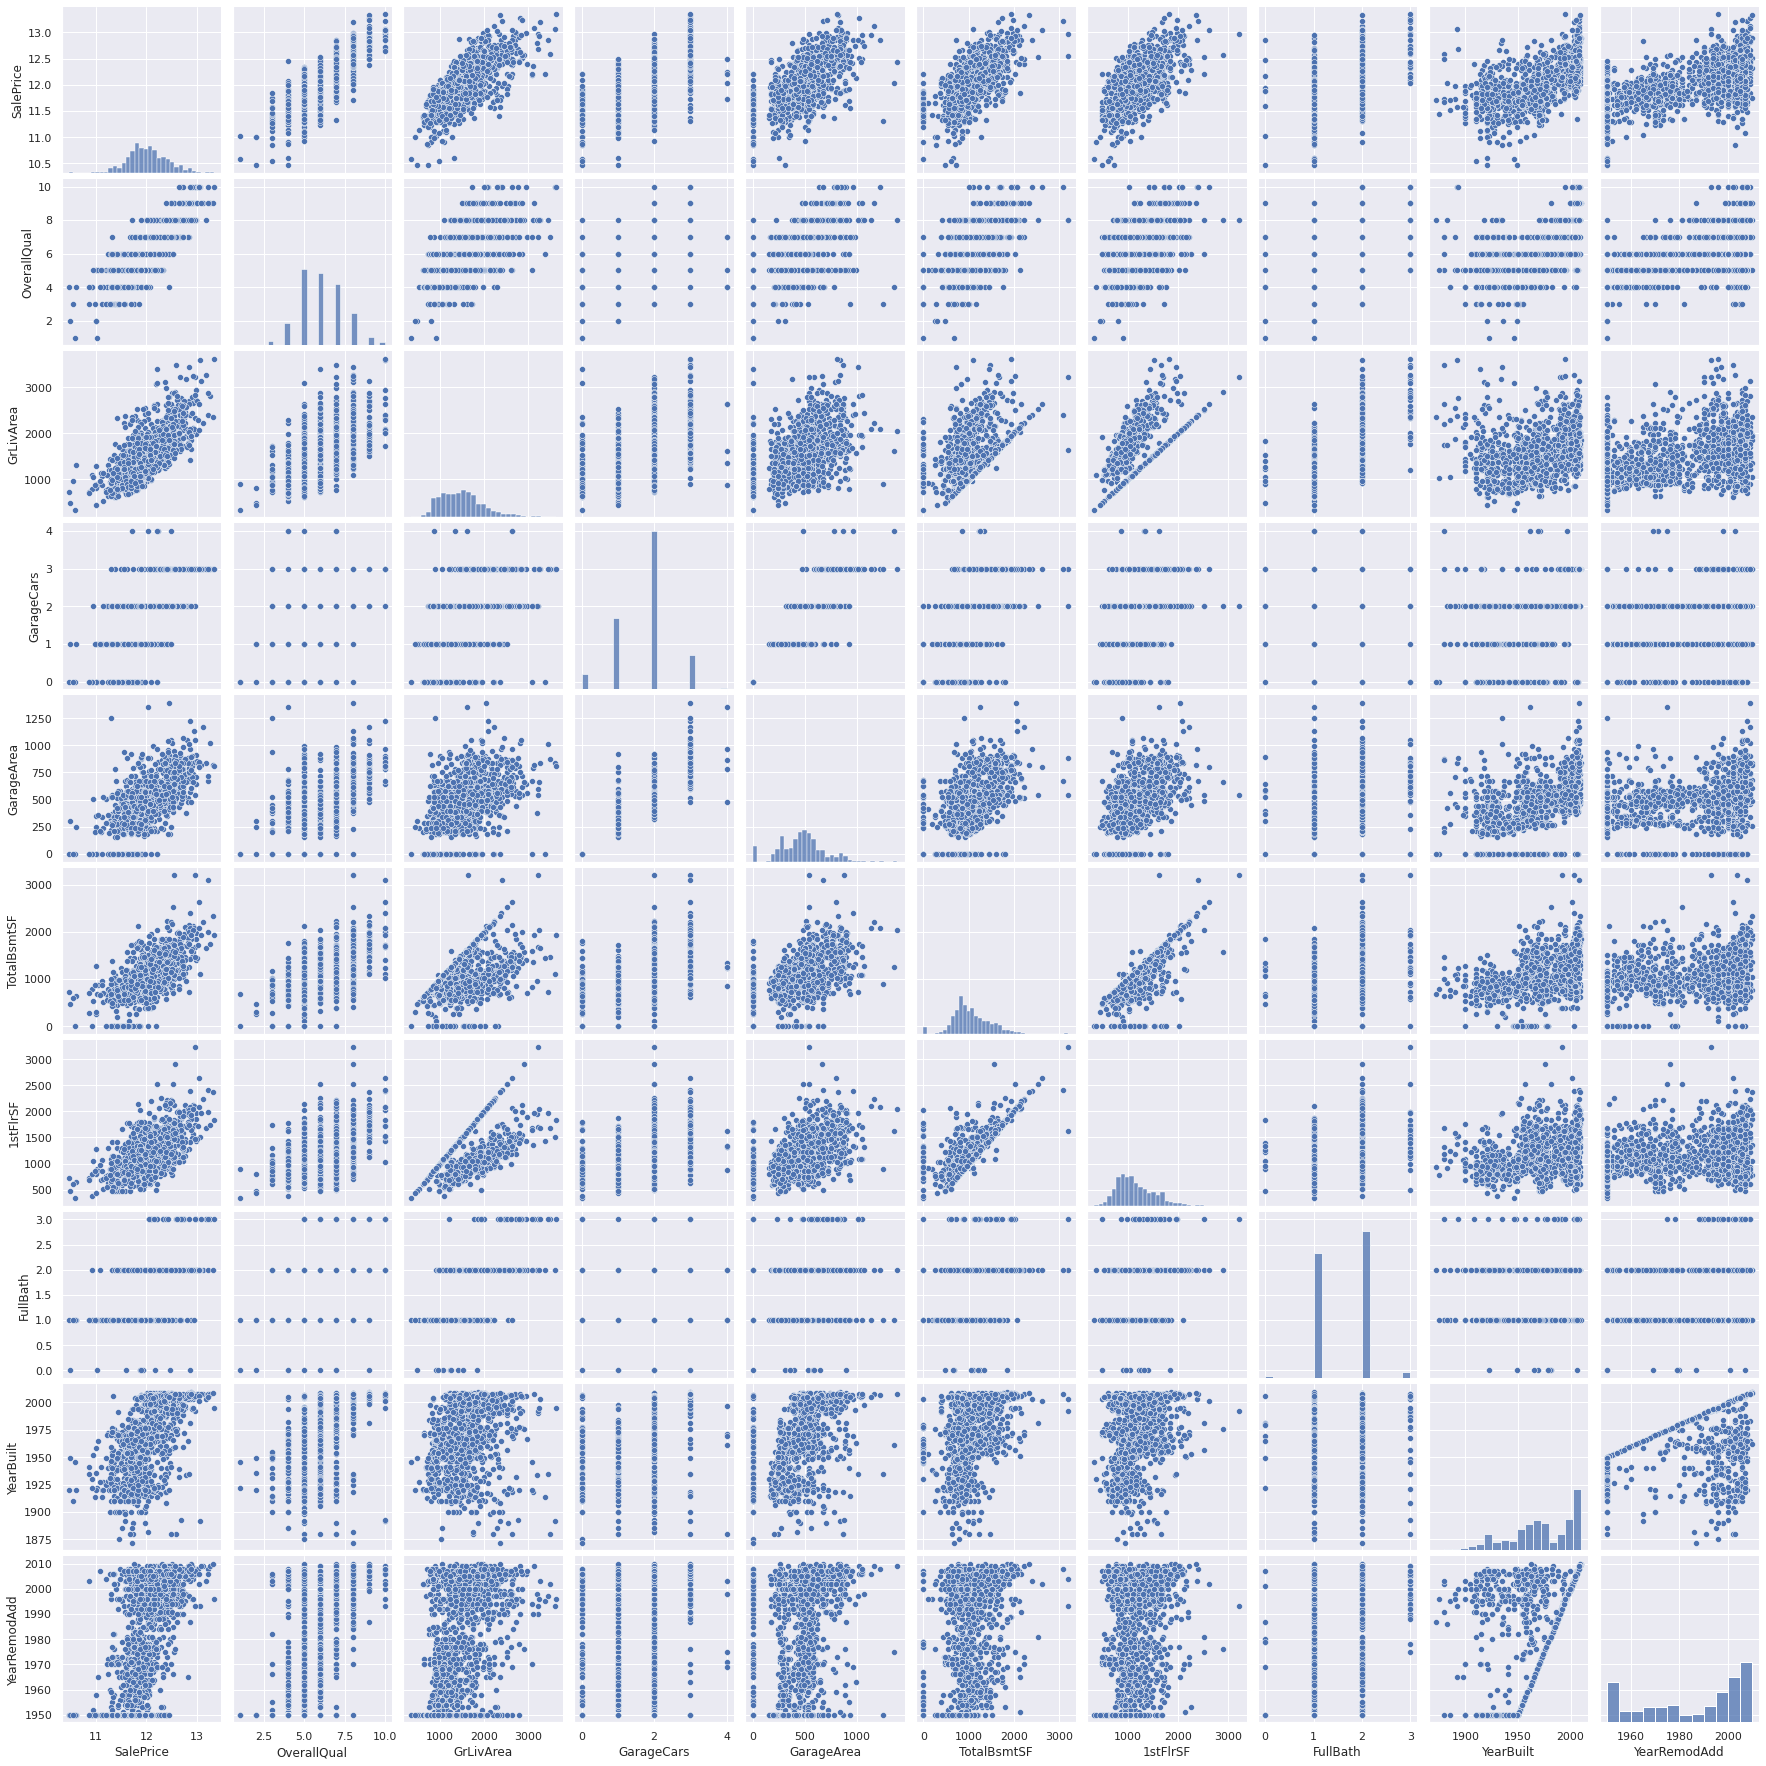

In [ ]:
sns.pairplot(train[corr['SalePrice'].head(10).index])

In [ ]:
trainrow=train.shape[0]
testrow=test.shape[0]

In [ ]:
y = train['SalePrice'].copy()
testids = test['Id'].copy()
data = pd.concat((train,test)).reset_index(drop=True)
data = data.drop('SalePrice',1)
data = data.drop('Id',axis=1)

In [ ]:
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [ ]:
# PoolQC
data['PoolQC']=data['PoolQC'].fillna('NA')
print(data['PoolQC'].unique())

# MiscFeature
data['MiscFeature']=data['MiscFeature'].fillna('NA')
print(data['MiscFeature'].unique())

# Alley
data['Alley']=data['Alley'].fillna('NA')
print(data['Alley'].unique())

# Fence
data['Fence']=data['Fence'].fillna('NA')
print(data['Fence'].unique())

# FireplaceQu
data['FireplaceQu']=data['FireplaceQu'].fillna('NA')
print(data['FireplaceQu'].unique())

# GarageCond
data['GarageCond']=data['GarageCond'].fillna('NA')
print(data['GarageCond'].unique())

# GarageQual
data['GarageQual']=data['GarageQual'].fillna('NA')
print(data['GarageQual'].unique())

# GarageFinish
data['GarageFinish']=data['GarageFinish'].fillna('NA')
print(data['GarageFinish'].unique())

['NA' 'Ex' 'Fa' 'Gd']
['NA' 'Shed' 'Gar2' 'Othr' 'TenC']
['NA' 'Grvl' 'Pave']
['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
['RFn' 'Unf' 'Fin' 'NA']


In [ ]:
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')
data['Exterior1st']=data['Exterior1st'].fillna('NA')

In [ ]:
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageType']=data['GarageType'].fillna(0)
data['GarageArea']=data['GarageArea'].fillna(0)
data['GarageCars']=data['GarageCars'].fillna(0)
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)
data['MasVnrArea']=data['MasVnrArea'].fillna(0)
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)

In [ ]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())

In [ ]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].dropna().index[0])
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].dropna().index[0])
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().index[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().index[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().index[0])
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().index[0])

In [ ]:
missing=data.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [ ]:
data['GrLivArea_2']=data['GrLivArea']**2
data['GrLivArea_3']=data['GrLivArea']**3
data['GrLivArea_4']=data['GrLivArea']**4

data['TotalBsmtSF_2']=data['TotalBsmtSF']**2
data['TotalBsmtSF_3']=data['TotalBsmtSF']**3
data['TotalBsmtSF_4']=data['TotalBsmtSF']**4

data['GarageCars_2']=data['GarageCars']**2
data['GarageCars_3']=data['GarageCars']**3
data['GarageCars_4']=data['GarageCars']**4

data['1stFlrSF_2']=data['1stFlrSF']**2
data['1stFlrSF_3']=data['1stFlrSF']**3
data['1stFlrSF_4']=data['1stFlrSF']**4

data['GarageArea_2']=data['GarageArea']**2
data['GarageArea_3']=data['GarageArea']**3
data['GarageArea_4']=data['GarageArea']**4

In [ ]:
data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF']
data=data.drop(['1stFlrSF','2ndFlrSF'],1)


In [ ]:
data = pd.get_dummies(data)

In [ ]:
X = data[:len(train)] #converted into train data
test = data[len(train):] #test data
print('Train Data Shape:',X.shape) #train set shape
print('Test Data Shape:',test.shape)#test set shape
print(y.shape)

Train Data Shape: (1456, 324)
Test Data Shape: (1459, 324)
(1456,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1092, 324)
(364, 324)
(1092,)
(364,)


In [ ]:
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(X_train,y_train)
print(reg_liner.score(X_train,y_train))
predictions1 = reg_liner.predict(X_test)
print(predictions1)

0.9518345206125752
[12.21247134 12.54043471 12.86932071 12.48519288 12.56013872 12.36359634
 13.0439322  11.97923548 11.88471407 11.79287062 12.73177946 12.65959541
 12.07487566 12.38531206 12.25051748 12.13617156 11.93607168 12.39859961
 11.57099441 12.74383105 12.09489705 11.92090963 11.5427844  11.74581411
 12.60094743 11.9637913  12.08653674 11.87521684 12.63228632 12.50168966
 12.1725967  12.10781152 12.31586431 12.1456969  12.49794097 11.70455883
 11.8042611  11.0215595  11.94336336 11.93853223 12.19686987 11.86923294
 12.01114664 11.93667049 12.26826959 12.05857097 11.47555146 11.87102715
 11.56133663 12.06465431 11.91638401 12.38330277 12.60600639 12.14063176
 11.93201053 11.66552198 12.43774949 12.69328278 11.70412216 11.59800596
 11.71959616 12.06327086 11.72852896 11.83918924 12.04908511 12.16055349
 11.85481705 11.95127752 11.45793826 12.48421428 12.28190076 12.64424512
 11.830907   12.16439005 12.10320562 12.04701306 11.64016878 11.56249713
 11.51667303 11.7034066  11.9719

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))
print(np.sqrt(mean_squared_error(y_test,predictions1)))

0.08373275076528477
0.013901463873088202
0.11790446926681025


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


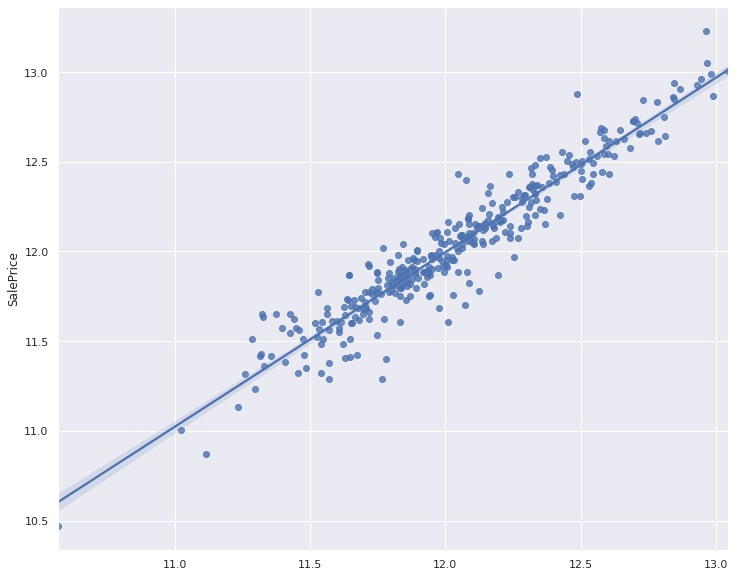

In [ ]:
plt.figure(figsize=(12,10))
sns.regplot(predictions1,y_test)

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_train, y_train)], 
             verbose=False)
print(my_model.score(X_train,y_train))

[09:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9914091409219695


In [ ]:
predictions =  reg_liner.predict(test)
my_submission = pd.DataFrame({"Id": testids,"SalePrice": np.expm1(predictions) })
my_submission.to_csv('final_submission.csv', index=False , header = True)
my_submission.head()

,Id,SalePrice
0,1461,114699.704791
1,1462,170912.664528
2,1463,185680.048796
3,1464,204613.028420
4,1465,187951.525569
